In [58]:
import keras
from keras.datasets import fashion_mnist
from keras import models, layers
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
#print(keras.__version__)

The model could be improved by adding an additional layer and more batches (apparently 50 worked well).

In [59]:
model = models.Sequential()
model.add(layers.Dense(
    512, 
    activation="relu", 
    input_shape=(28 * 28,)
))
model.add(layers.Dense(
    300, 
    activation="relu", 
))
model.add(layers.Dense(10, activation="softmax"))
model.summary()

model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_18 (Dense)             (None, 300)               153900    
_________________________________________________________________
dense_19 (Dense)             (None, 10)                3010      
Total params: 558,830
Trainable params: 558,830
Non-trainable params: 0
_________________________________________________________________


Train: (60000, 28, 28)
Test: (10000, 28, 28)


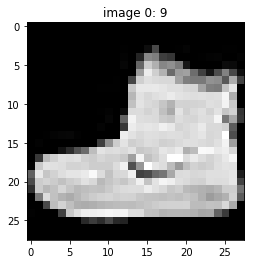

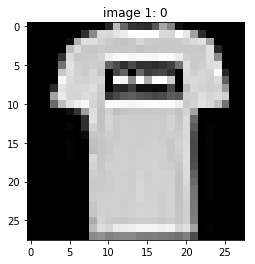

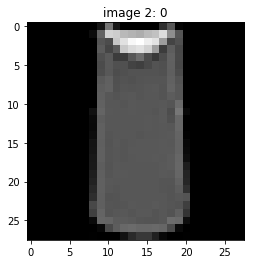

Before: 9
After: [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


In [60]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print("Train:", train_images.shape)
print("Test:", test_images.shape)

for i in range(3):
    plt.imshow(train_images[i], cmap="gray")
    plt.title("image " + str(i) + ": " + str(train_labels[i]))
    plt.show()

train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255.0

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype("float32") / 255.0

from keras.utils import to_categorical

print("Before:", train_labels[0])
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)
print("After:", train_labels[0])

In [61]:
history = model.fit(
    train_images, 
    train_labels, 
    epochs=50, 
    batch_size=128
)

Epoch 1/50
60000/60000 [==============================] - 10s 159us/step - loss: 0.5416 - acc: 0.8030
Epoch 2/50
60000/60000 [==============================] - 9s 153us/step - loss: 0.3753 - acc: 0.8613
Epoch 3/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.3349 - acc: 0.8769
Epoch 4/50
60000/60000 [==============================] - 9s 145us/step - loss: 0.3116 - acc: 0.8849
Epoch 5/50
60000/60000 [==============================] - 9s 150us/step - loss: 0.2915 - acc: 0.8916
Epoch 6/50
60000/60000 [==============================] - 9s 148us/step - loss: 0.2799 - acc: 0.8957
Epoch 7/50
60000/60000 [==============================] - 9s 146us/step - loss: 0.2684 - acc: 0.9009
Epoch 8/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.2589 - acc: 0.9043
Epoch 9/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.2501 - acc: 0.9081
Epoch 10/50
60000/60000 [==============================] - 9s 147us/step - loss: 0.2405 - 

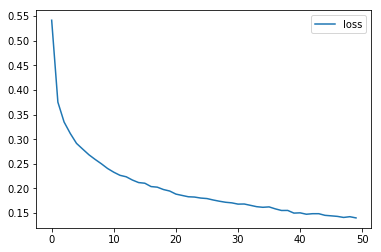

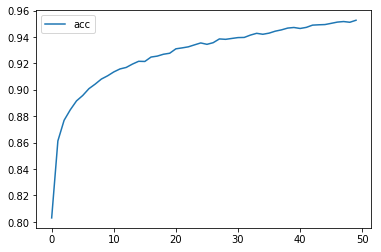

In [62]:
plt.plot(history.history["loss"], label="loss")
plt.legend()
plt.show()
plt.close()

plt.plot(history.history["acc"], label="acc")
plt.legend()
plt.show()
plt.close()

In [63]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(test_loss, test_acc)

10000/10000 [==============================] - 1s 113us/step
0.6260498329639435 0.8892


In [64]:
print(np.max(model.predict(train_images[0:1])))
print(np.argmax(model.predict(train_images[0:1])))
print(train_labels[0])

1.0
9
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
